In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
import math
from PIL import Image
from scipy import ndimage
from neural_network_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%reload_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
train_X, train_Y, test_X, test_Y = load_data('Data/train_test_data.h5')

Keys : [u'test_X', u'test_Y', u'test_mean', u'train_X', u'train_Y', u'train_mean']
train_X is a (3000, 160, 160, 3) array and has 3000 examples
train_Y is a (1, 3000) array and has 3000 examples
test_X is a (1000, 160, 160, 3) array and has 1000 examples
test_Y is a (1, 1000) array and has 1000 examples


y = 1


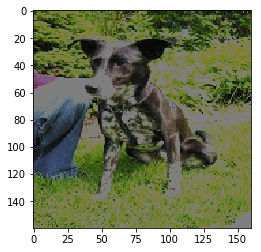

In [3]:
# Example of a picture
index = 2243
plt.imshow(train_X[index])
print('y = {}' .format(train_Y[0,index]))

In [4]:
# Reshaping the training and test examples
train_X_flatten = train_X.reshape(train_X.shape[0], -1).T     # -1 makes reshape flatten the other dimensions
test_X_flatten = test_X.reshape(test_X.shape[0], -1).T

# Standardizing the features to lie between 0 and 1
train_X = train_X_flatten/255.
test_X = test_X_flatten/255.

print("train_X's shape now : " + str(train_X.shape))
print("test_X's shape now : " + str(test_X.shape))

train_X's shape now : (76800, 3000)
test_X's shape now : (76800, 1000)


In [5]:
def L_layer_model(X, Y, layer_dims, learning_rate = 0.02, num_iterations = 3000, print_cost=False):
    np.random.seed(1)
    costs = []
    
    parameters = initialize_parameters(layer_dims, init_type="he")
    
    # loop - gradient descent
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters, keep_prob=0.5)
        
        cost = compute_cost(AL, Y, parameters, lambd=0.7)
        
        grads = L_model_backward(AL, Y, caches, lambd=0.7, keep_prob=0.5)
        
        parameters = update_parameters_with_gd(parameters, grads, learning_rate)
        
        # Print cost every 100 training examples
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i : %f" %(i, cost))
            costs.append(cost)
            
    # Plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations per tens')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    
    return parameters       

In [6]:
# # Four Layer Model
# layer_dims = [76800, 20, 7, 5, 1]     # 4 - layer model

# # Training the L-layer model
# parameters = L_layer_model(train_X, train_Y, layer_dims, num_iterations = 2500, print_cost = True)

In [7]:
def L_layer_Optimized_model(X, Y, layer_dims, lambd=0.7, keep_prob=0.5, optimizer="grad_descent", learning_rate=0.02, mini_batch_size=64, beta=0.9, beta1=0.9, beta2=0.999, epsilon=1e-8, num_epochs=2500, print_cost=True):
    L = len(layer_dims)
    costs = []
    t = 0
    seed = 1
    
    parameters = initialize_parameters(layer_dims, init_type="random")
    
    if optimizer == "grad_descent":
        pass
    elif optimizer == "momentum":
        v = initialize_momentum(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
        
    for i in range(num_epochs):
        seed = seed + 1
        minibatches = random_init_minibatches(X, Y, mini_batch_size, seed)
        
        for minibatch in minibatches:
            (minibatch_X, minibatch_Y) = minibatch
            
            AL, caches = L_model_forward(minibatch_X, parameters, keep_prob)
            
            cost = compute_cost(AL, minibatch_Y, parameters, lambd)
            
            grads = L_model_backward(AL, minibatch_Y, caches, lambd, keep_prob)
            
            if optimizer == "grad_descent":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam" :
                t = t + 1     # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s, t, learning_rate, beta1, beta2, epsilon)
                
        # Print cost every 100 training examples
        if print_cost and i % 200 == 0:
            print("Cost after epoch %i : %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    #plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
            
    return parameters

In [ ]:
layer_dims = [76800, 20, 7, 5, 1]

parameters = L_layer_Optimized_model(train_X, train_Y, layer_dims, lambd=0.7, keep_prob=1, optimizer = "adam")

Cost after epoch 0 : 0.700485
Cost after epoch 200 : 0.693263
Cost after epoch 400 : 0.693263
